In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

/Users/thilina/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Data Preprocessing 

#### Load the dataset

In [2]:
df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.shape

(891, 12)

In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Select only the wanted columns

In [7]:
df = df[['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked']]

#### Missing value investigation

In [8]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [9]:
df = df.dropna()
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
885,886,0,3,female,39.0,0,5,29.1250,Q
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
889,890,1,1,male,26.0,0,0,30.0000,C


#### Remove Duplicates

In [10]:
df.duplicated().sum()

0

In [11]:
### Since, "PassengerId" column has unique values, we can that columns as well
df = df.reset_index()
df = df.drop(columns = ['PassengerId' , 'index'])
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
707,0,3,female,39.0,0,5,29.1250,Q
708,0,2,male,27.0,0,0,13.0000,S
709,1,1,female,19.0,0,0,30.0000,S
710,1,1,male,26.0,0,0,30.0000,C


#### label encoding

In [12]:
columns_to_label_encode = ['Survived', 'Pclass', 'Sex' , 'SibSp' , 'Parch' , 'Embarked']
label_encoder = LabelEncoder()
for column in columns_to_label_encode:
    df[column] = label_encoder.fit_transform(df[column])
    
df.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int64
dtype: object

In [13]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,1,22.0,1,0,7.2500,2
1,1,0,0,38.0,1,0,71.2833,0
2,1,2,0,26.0,0,0,7.9250,2
3,1,0,0,35.0,1,0,53.1000,2
4,0,2,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
707,0,2,0,39.0,0,5,29.1250,1
708,0,1,1,27.0,0,0,13.0000,2
709,1,0,0,19.0,0,0,30.0000,2
710,1,0,1,26.0,0,0,30.0000,0


In [14]:
df['Survived'].value_counts() ## Dataset is not a balanced one

Survived
0    424
1    288
Name: count, dtype: int64

### Divide the dataset

In [15]:
X = df.drop('Survived', axis=1) 
y = df['Survived'] 

In [16]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ML models

###  Random forest model

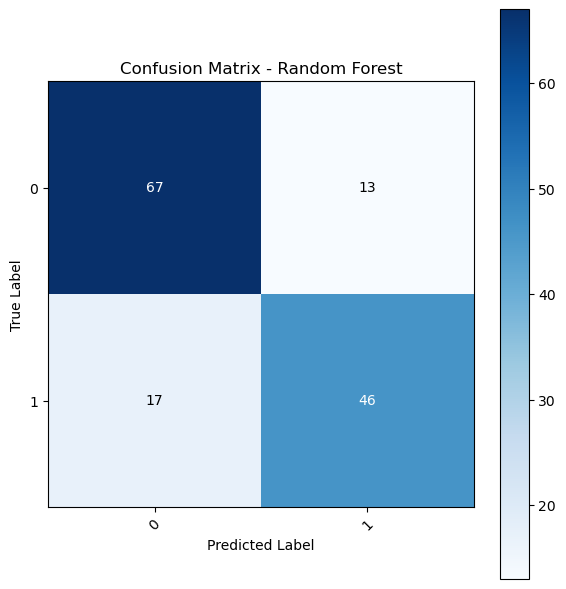

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        80
           1       0.78      0.73      0.75        63

    accuracy                           0.79       143
   macro avg       0.79      0.78      0.79       143
weighted avg       0.79      0.79      0.79       143



In [17]:
# Create and fit the Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Make predictions on the test set using the Random Forest model
y_pred_rf = random_forest_model.predict(X_test)

# Get the confusion matrix for the Random Forest model
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)


# Plot the confusion matrix for the Random Forest model
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix_rf, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Random Forest')
plt.colorbar()
tick_marks_rf = np.arange(len(set(y)))
plt.xticks(tick_marks_rf, set(y), rotation=45)
plt.yticks(tick_marks_rf, set(y))
for i in range(len(set(y))):
    for j in range(len(set(y))):
        plt.text(j, i, str(conf_matrix_rf[i, j]), ha='center', va='center', color='white' if i == j else 'black')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# Get the classification report for the Random Forest model
class_report_rf = classification_report(y_test, y_pred_rf)
print("Random Forest Classification Report:")
print(class_report_rf)

In [18]:
import pickle

with open("titanic_model.pkl", "wb") as f:
    pickle.dump(random_forest_model, f)

In [19]:
y_pred_rf

array([1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1])